In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_csv(r"D:\Data Set\archive (21)\salary_prediction_data.csv")

In [47]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
new=data.groupby("Job_Title")
re=new['Salary'].aggregate(np.mean)
re

Job_Title
Analyst      93801.761223
Director    120580.595991
Engineer     97266.358019
Manager     108735.664908
Name: Salary, dtype: float64

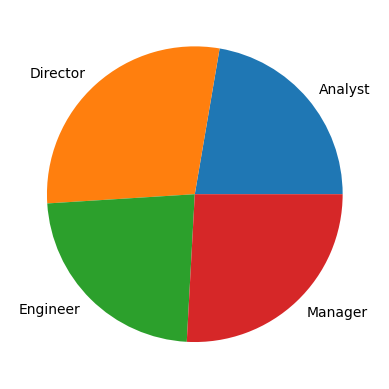

In [5]:
plt.pie(re,labels=re.index);

<Axes: xlabel='Job_Title', ylabel='Salary'>

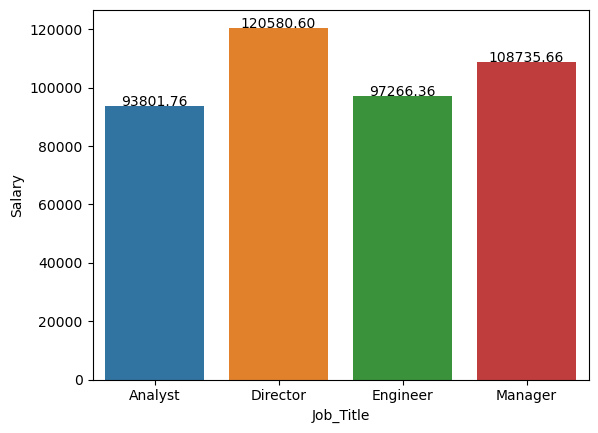

In [6]:
for i, value in enumerate(re):
    plt.text(i, value + 0.5, '{:.2f}'.format(value), ha='center')
sns.barplot(x=re.index,y=re)

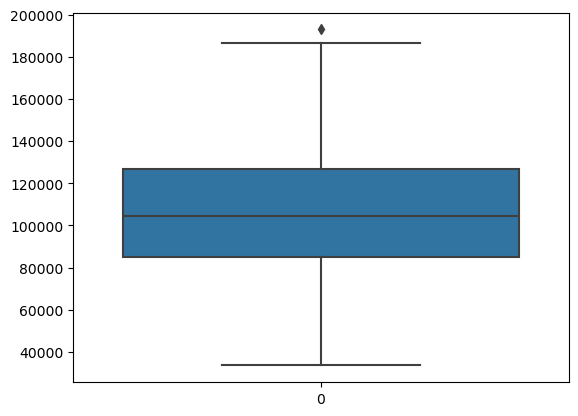

In [7]:


sns.boxplot(data['Salary']);

In [8]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [9]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
v=['Education','Location','Job_Title','Gender']
for i in v:
    data[i]=label.fit_transform(data[i])

In [10]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175


<Axes: ylabel='Salary'>

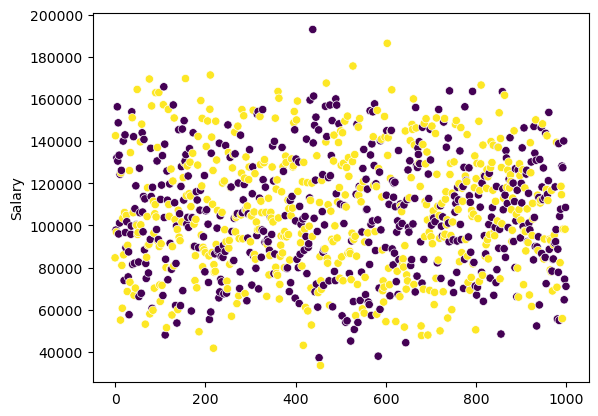

In [21]:
sns.scatterplot(data['Salary'],c=data['Gender'])

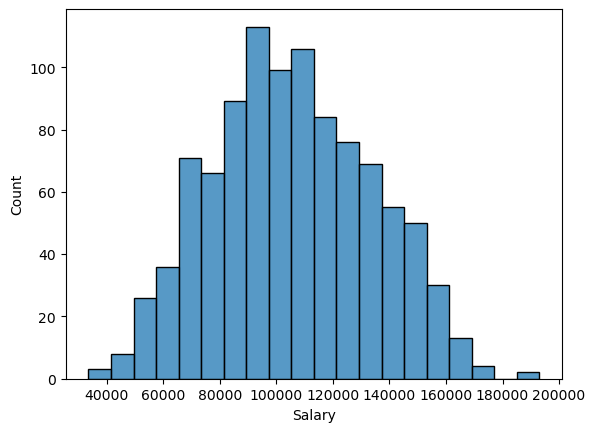

In [26]:
sns.histplot(data['Salary']);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


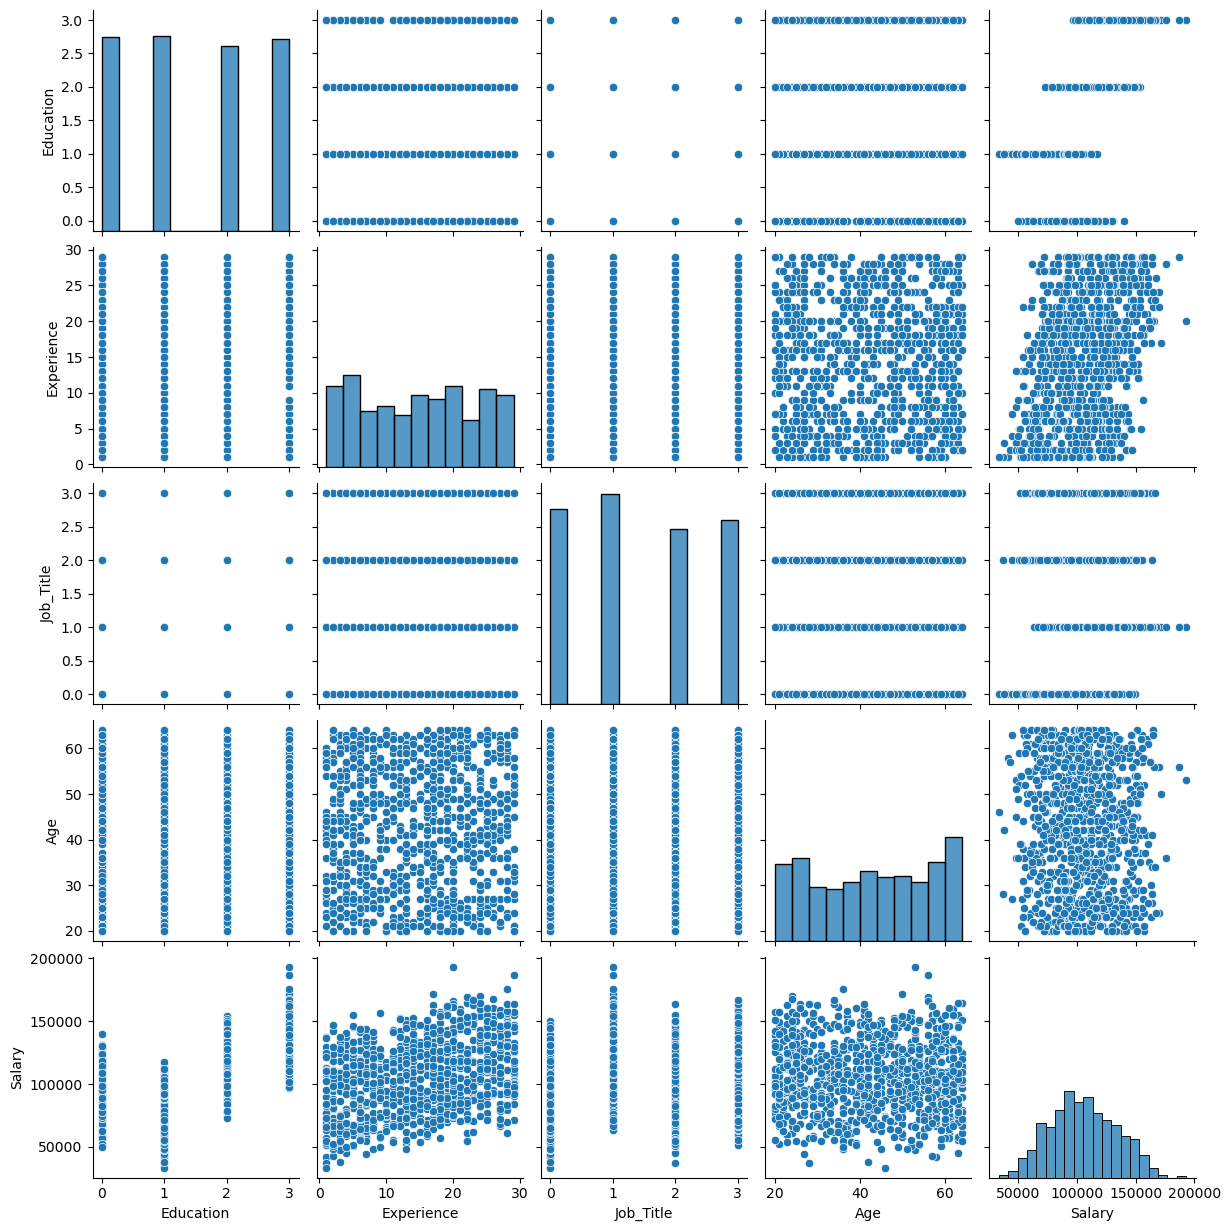

In [29]:
sns.pairplot(data=data[['Education','Experience','Job_Title','Age','Salary']])

<Axes: >

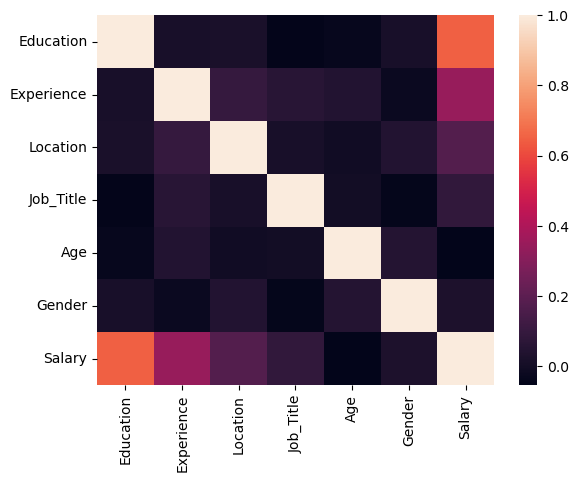

In [44]:
sns.heatmap(data=data.corr())

In [48]:
data.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [51]:
data_j=pd.get_dummies(data['Job_Title'],drop_first=True).astype(int)

In [52]:
data_j

,Director,Engineer,Manager
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,0
...,...,...,...
995,0,0,0
996,0,1,0
997,0,0,0
998,1,0,0


In [53]:
data=pd.concat([data,data_j],axis=1)

In [54]:
data

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Director,Engineer,Manager
0,High School,8,Urban,Manager,63,Male,84620.053665,0,0,1
1,PhD,11,Suburban,Director,59,Male,142591.255894,1,0,0
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,0,0,1
3,High School,29,Rural,Director,45,Male,96834.671282,1,0,0
4,PhD,25,Urban,Analyst,26,Female,132157.786175,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864,0,0,0
996,High School,24,Urban,Engineer,30,Female,74468.205020,0,1,0
997,Master,18,Rural,Analyst,44,Male,98207.026024,0,0,0
998,Bachelor,27,Suburban,Director,31,Female,108544.922720,1,0,0


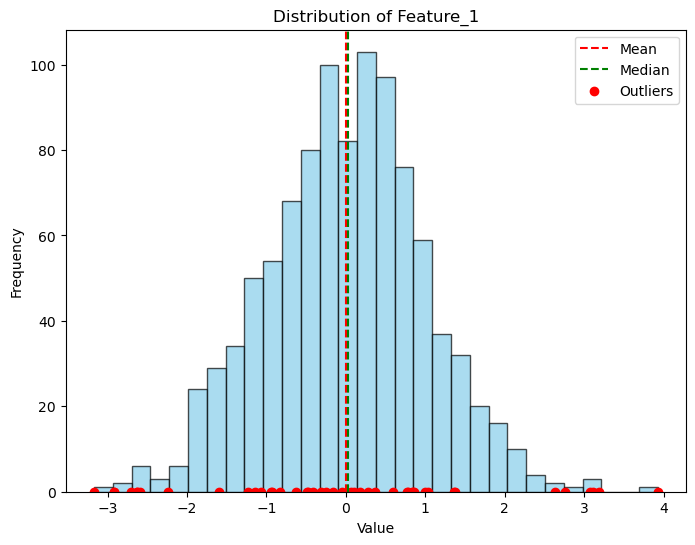

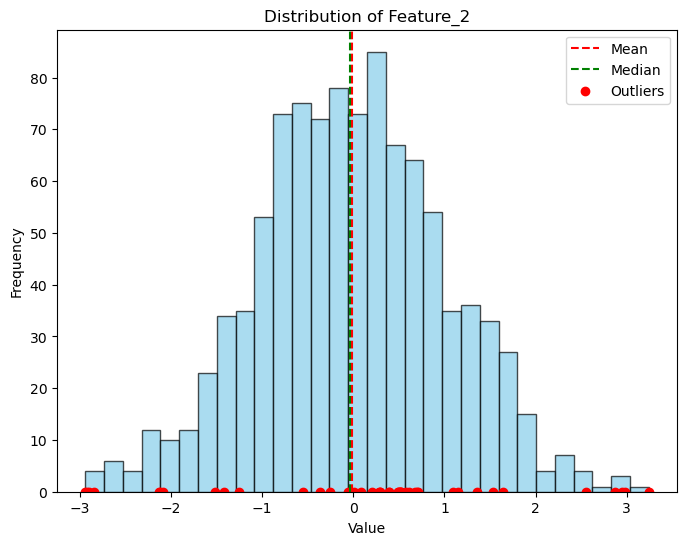

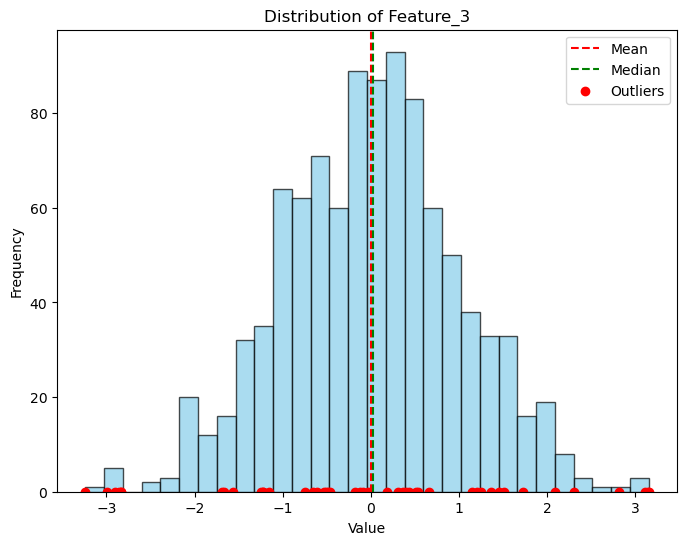

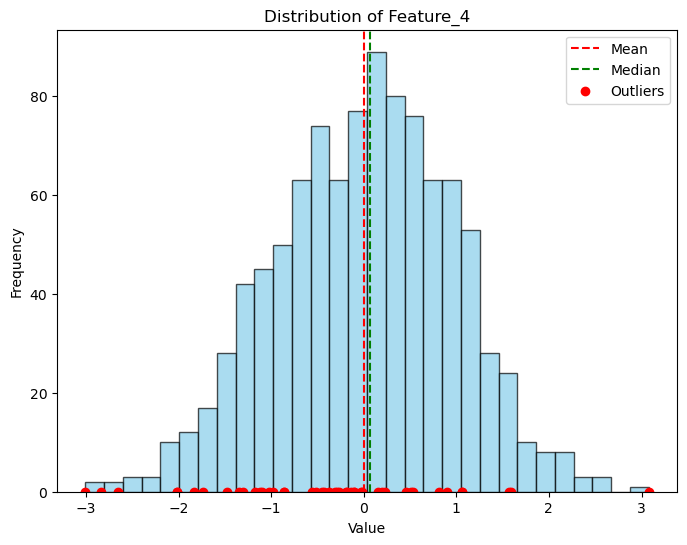

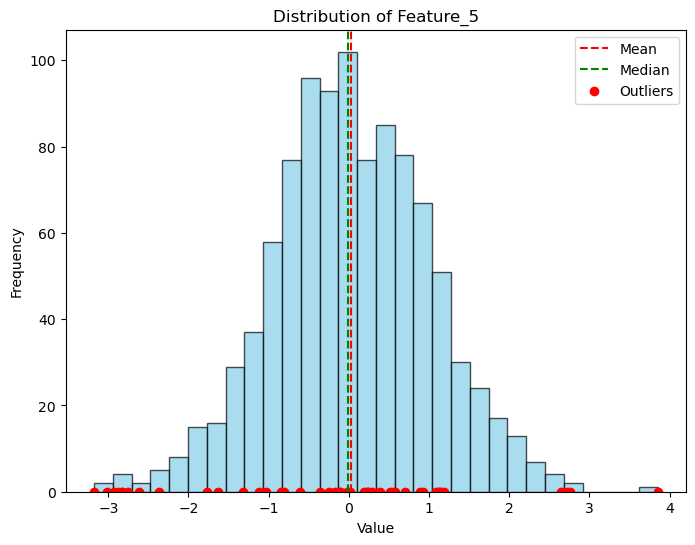

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset (replace this with your actual dataset)
np.random.seed(42)
num_samples = 1000
num_features = 5
data = pd.DataFrame(np.random.randn(num_samples, num_features), columns=[f'Feature_{i}' for i in range(1, num_features+1)])

# Function to identify outliers using the IQR method
def detect_outliers_iqr(data):
    outliers = pd.DataFrame()
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col])
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(data)

# Visualize outliers
for col in data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.axvline(x=data[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(x=data[col].median(), color='green', linestyle='--', label='Median')
    plt.scatter(outliers[col], np.zeros_like(outliers[col]), color='red', label='Outliers')
    plt.legend()
    plt.show()
